In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('qatar2022.csv')

In [3]:
data1.sample(10)

,Date,Time,Home,Away,Attendance,Venue
49,03 December 2022,22:00 (00:30),Argentina,Australia,"45,032",Ahmed bin Ali Stadium
50,04 December 2022,18:00 (20:30),France,Poland,"40,989",Al Thumama Stadium (Neutral Site)
32,29 November 2022,18:00 (20:30),Ecuador,Senegal,"44,569",Khalifa International Stadium
37,30 November 2022,18:00 (20:30),Tunisia,France,"43,627",Education City Stadium
6,22 November 2022,19:00 (21:30),Mexico,Poland,"39,369",Stadium 974
42,01 December 2022,22:00 (00:30),Costa Rica,Germany,"67,054",Al Bayt Stadium
31,28 November 2022,22:00 (00:30),Portugal,Uruguay,"88,668",Lusail Iconic Stadium
57,09 December 2022,22:00 (00:30),Netherlands,Argentina,"88,235",Lusail Iconic Stadium
20,26 November 2022,13:00 (15:30),Tunisia,Australia,"41,823",Al Janoub Stadium
33,29 November 2022,18:00 (20:30),Netherlands,Qatar,"66,784",Al Bayt Stadium


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        64 non-null     object
 1   Time        64 non-null     object
 2   Home        64 non-null     object
 3   Away        64 non-null     object
 4   Attendance  64 non-null     object
 5   Venue       64 non-null     object
dtypes: object(6)
memory usage: 3.1+ KB


In [5]:
data1.describe()

,Date,Time,Home,Away,Attendance,Venue
count,64,64,64,64,64,64
unique,23,5,32,34,60,9
top,01 December 2022,22:00 (00:30),Argentina,Morocco,"88,966",Lusail Iconic Stadium
freq,4,24,5,4,3,10


In [6]:
data1.isnull().sum()

Date          0
Time          0
Home          0
Away          0
Attendance    0
Venue         0
dtype: int64

In [7]:
data1.head()

,Date,Time,Home,Away,Attendance,Venue
0,20 November 2022,19:00 (21:30),Qatar,Ecuador,"67,372",Al Bayt Stadium
1,21 November 2022,16:00 (18:30),England,Iran,"45,334",Khalifa International Stadium
2,21 November 2022,19:00 (21:30),Senegal,Netherlands,"41,721",Al Thumama Stadium
3,21 November 2022,22:00 (00:30),USA,Wales,"43,418",Ahmed bin Ali Stadium
4,22 November 2022,13:00 (15:30),Argentina,Saudi Arabia,"88,012",Lusail Iconic Stadium


In [8]:
data1['Attendance'] = data1['Attendance'].replace({',':''}, regex = True)
data1[['Time','24hrs']] = data1['Time'].str.split('(', expand = True)
data1['Time'] = data1['Time'].replace({':':''}, regex = True)

In [9]:
data1.dtypes

Date          object
Time          object
Home          object
Away          object
Attendance    object
Venue         object
24hrs         object
dtype: object

In [10]:
data1['Date'] = pd.to_datetime(data1['Date'])
data1['Attendance'] = data1['Attendance'].astype(int)
data1['Time'] = data1['Time'].astype(float).astype(int)

In [11]:
data1.head()

,Date,Time,Home,Away,Attendance,Venue,24hrs
0,2022-11-20,1900,Qatar,Ecuador,67372,Al Bayt Stadium,21:30)
1,2022-11-21,1600,England,Iran,45334,Khalifa International Stadium,18:30)
2,2022-11-21,1900,Senegal,Netherlands,41721,Al Thumama Stadium,21:30)
3,2022-11-21,2200,USA,Wales,43418,Ahmed bin Ali Stadium,00:30)
4,2022-11-22,1300,Argentina,Saudi Arabia,88012,Lusail Iconic Stadium,15:30)


In [12]:
data1.drop(columns=['24hrs'],inplace=True)

In [13]:
data1.head()

,Date,Time,Home,Away,Attendance,Venue
0,2022-11-20,1900,Qatar,Ecuador,67372,Al Bayt Stadium
1,2022-11-21,1600,England,Iran,45334,Khalifa International Stadium
2,2022-11-21,1900,Senegal,Netherlands,41721,Al Thumama Stadium
3,2022-11-21,2200,USA,Wales,43418,Ahmed bin Ali Stadium
4,2022-11-22,1300,Argentina,Saudi Arabia,88012,Lusail Iconic Stadium


In [14]:
cols = ['Date', 'Time', 'Home','Away','Attendance','Venue']   #Unique Values
for i in cols:
    print("Unique Values of ",i,"=",data1[i].unique())
    print('..............................')

Unique Values of  Date = ['2022-11-20T00:00:00.000000000' '2022-11-21T00:00:00.000000000'
 '2022-11-22T00:00:00.000000000' '2022-11-23T00:00:00.000000000'
 '2022-11-24T00:00:00.000000000' '2022-11-25T00:00:00.000000000'
 '2022-11-26T00:00:00.000000000' '2022-11-27T00:00:00.000000000'
 '2022-11-28T00:00:00.000000000' '2022-11-29T00:00:00.000000000'
 '2022-11-30T00:00:00.000000000' '2022-12-01T00:00:00.000000000'
 '2022-12-02T00:00:00.000000000' '2022-12-03T00:00:00.000000000'
 '2022-12-04T00:00:00.000000000' '2022-12-05T00:00:00.000000000'
 '2022-12-06T00:00:00.000000000' '2022-12-09T00:00:00.000000000'
 '2022-12-10T00:00:00.000000000' '2022-12-13T00:00:00.000000000'
 '2022-12-14T00:00:00.000000000' '2022-12-17T00:00:00.000000000'
 '2022-12-18T00:00:00.000000000']
..............................
Unique Values of  Time = [1900 1600 2200 1300 1800]
..............................
Unique Values of  Home = ['Qatar ' 'England' 'Senegal' 'USA' 'Argentina' 'Denmark' 'Mexico'
 'France' 'Morocco' 

In [15]:
data1['Daytime'] = pd.cut(data1['Time'], bins=[1200,1800,2200], labels=['Day', 'Night'])

In [16]:
data1.head()

,Date,Time,Home,Away,Attendance,Venue,Daytime
0,2022-11-20,1900,Qatar,Ecuador,67372,Al Bayt Stadium,Night
1,2022-11-21,1600,England,Iran,45334,Khalifa International Stadium,Day
2,2022-11-21,1900,Senegal,Netherlands,41721,Al Thumama Stadium,Night
3,2022-11-21,2200,USA,Wales,43418,Ahmed bin Ali Stadium,Night
4,2022-11-22,1300,Argentina,Saudi Arabia,88012,Lusail Iconic Stadium,Day


In [17]:
data1.describe()

,Time,Attendance
count,64.000000,64.000000
mean,1884.375000,53191.437500
std,296.657972,17108.666048
min,1300.000000,39089.000000
25%,1800.000000,42424.000000
50%,1900.000000,44093.000000
75%,2200.000000,66851.500000
max,2200.000000,88966.000000


# Visualization

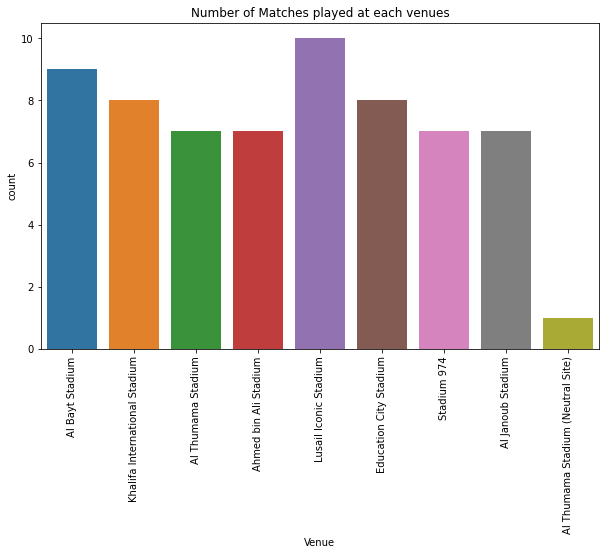

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data1['Venue'])
plt.xticks(rotation=90)
plt.title('Number of Matches played at each venues')
plt.show()

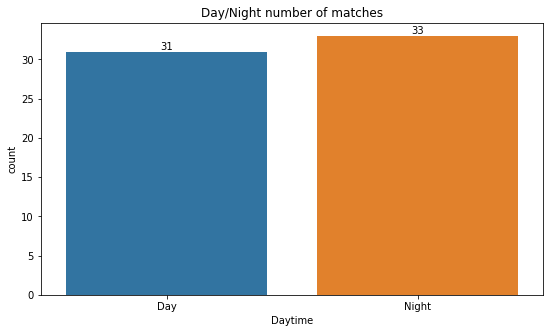

In [19]:
plt.figure(figsize=(9,5))
ax = sns.countplot(x='Daytime', data=data1)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
plt.title('Day/Night number of matches')
plt.show()

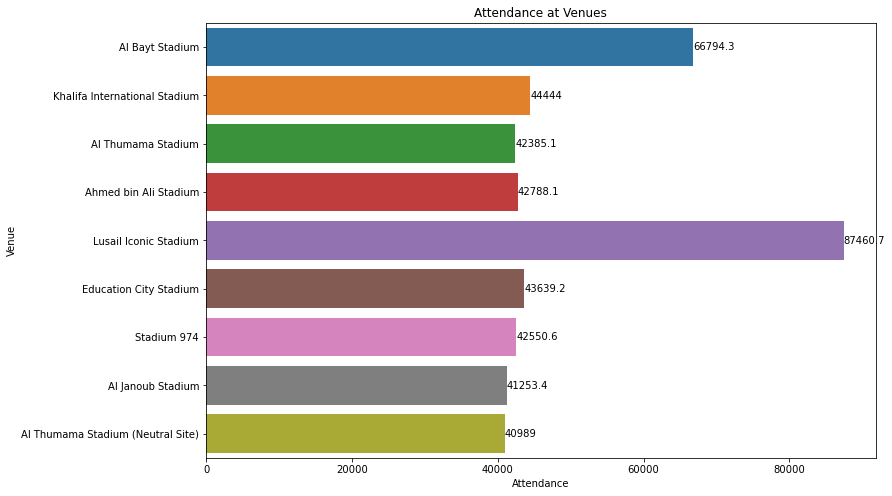

In [20]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Attendance', y='Venue', data=data1, ci=None)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=0)
plt.title('Attendance at Venues')
plt.show()

Text(0.5, 1.0, 'Most Attendents in Daytime')

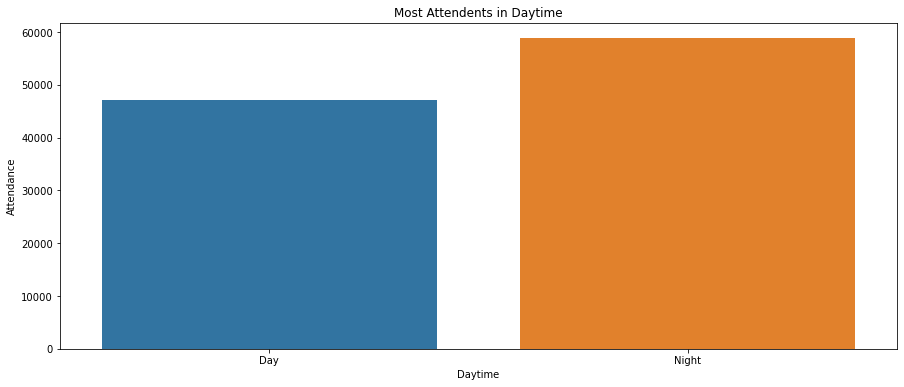

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(y=data1['Attendance'], x=data1['Daytime'], ci=None)
plt.title('Most Attendents in Daytime')

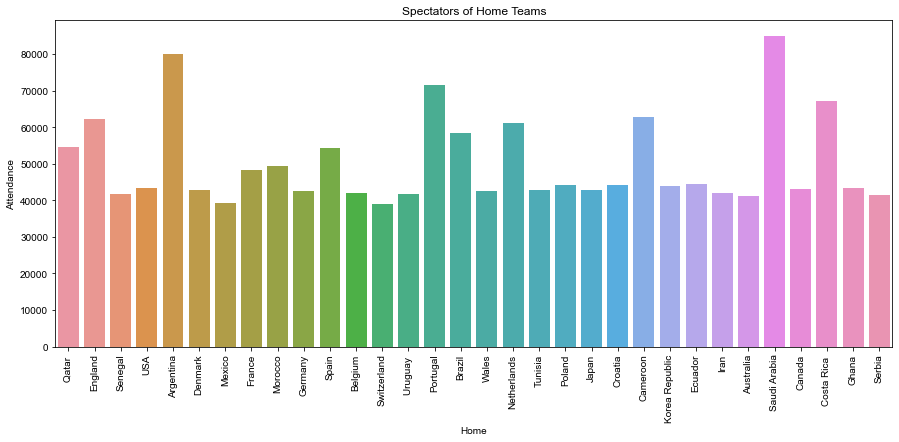

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(x='Home', y='Attendance', data=data1, ci=None)
sns.set_style('whitegrid')
plt.title('Spectators of Home Teams')
plt.xticks(rotation=90)
plt.show()

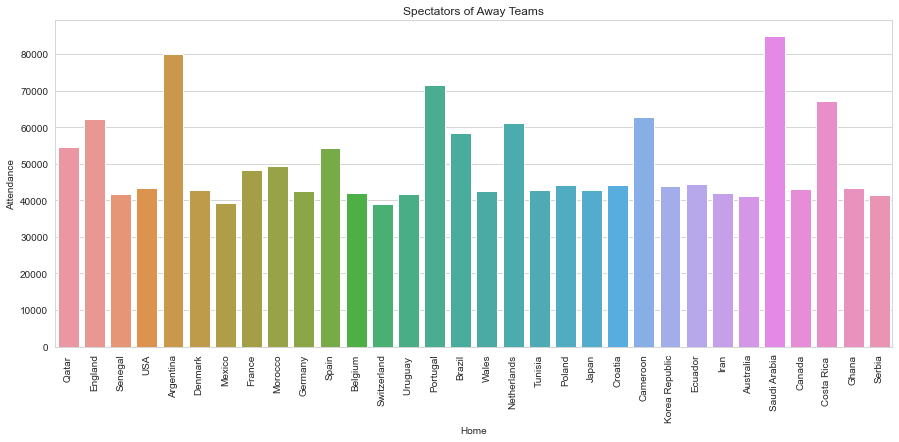

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x='Home', y='Attendance', data=data1, ci=None)
sns.set_style('whitegrid')
plt.title('Spectators of Away Teams')
plt.xticks(rotation=90)
plt.show()

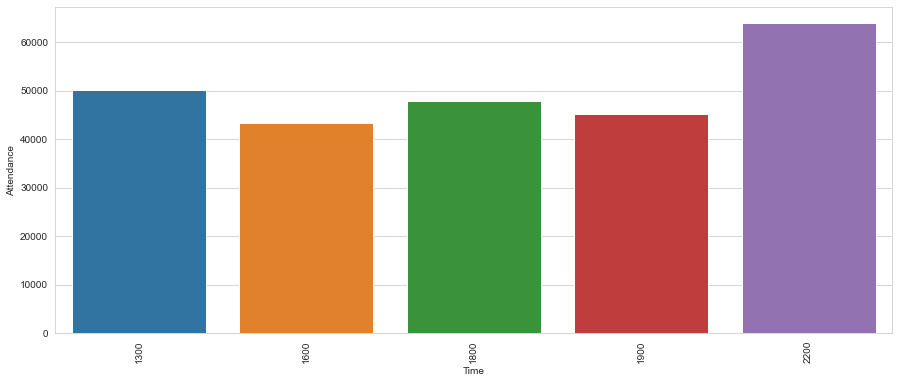

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(x=data1['Time'], y=data1['Attendance'], ci=None)
plt.xticks(rotation=90)
plt.show()